# 0. Imports

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

from functions import utils, get_features

from functions.plotting import plot_conformers

import warnings
warnings.filterwarnings("ignore")

/var/folders/q_/pxh8rpm1021bvcmqb5qg17p00000gn/T/ipykernel_96095/3789427626.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# this sets plot style defaults for the whole notebook

paramsscreen = {'backend': 'ps',
            'axes.labelsize': 15,
           'legend.fontsize': 15,
           'xtick.labelsize': 13,
           'ytick.labelsize': 13,
           'axes.titlesize': 16}

plt.rcParams.update(paramsscreen)

# 1. Define paths and ligand IDs

This sets the paths to the XYZ coordinate files from CREST conformer searches (full and clustered with an energy window of 5 and 10 kcal/mol). The path for the CSV files containing the features for each complex is also defined. A list of ligands to analzye is also defined. You shouldn't need to change either of these variables.

In [3]:
full_5kcal = Path("./calculation_files/crest/5kcal_full")
clustered_5kcal = Path("./calculation_files/crest/5kcal_clustered")
full_10kcal = Path("./calculation_files/crest/10kcal_full")
clustered_10kcal = Path("./calculation_files/crest/10kcal_clustered")

features_path = Path("./feature_files")

ligands = ["pp000067", "pp000085", "pp000091", "pp000110", "pp000133", "pp000135",
           "pp000298", "pp000321", "pp000390", "pp000425", "pp000458", "pp000670"]

# 2. Plot bar graphs of ensemble sizes

## 2.1. Get lists of numbers of conformers by ligand id

This create lists of the number of conformers for each complex from each CREST conformer search for plotting later as a bar graph.

In [ ]:
# 5 kcal/mol full ensemble
full_5kcal_no_conformers = []
for ligand in ligands:
    no_conformers = utils.count_conformer_number(full_5kcal, ligand)
    full_5kcal_no_conformers.append(no_conformers)

# 5 kcal/mol clustered ensemble
clustered_5kcal_no_conformers = []
for ligand in ligands:
    no_conformers = utils.count_conformer_number(clustered_5kcal, ligand)
    clustered_5kcal_no_conformers.append(no_conformers)

# 10 kcal/mol full ensemble
full_10kcal_no_conformers = []
for ligand in ligands:
    no_conformers = utils.count_conformer_number(full_10kcal, ligand)
    full_10kcal_no_conformers.append(no_conformers)

# 10 kcal/mol clustered ensemble
clustered_10kcal_no_conformers = []
for ligand in ligands:
    no_conformers = utils.count_conformer_number(clustered_10kcal, ligand)
    clustered_10kcal_no_conformers.append(no_conformers)

## 2.2. Setup plotting dictionary

This dictionary defines which conformer set you wish to plot. Comment out the lines you wish to exclude from plotting.

In [ ]:
plotting_dictionary = {"5kcal_full": full_5kcal_no_conformers,
                          "5kcal_clustered": clustered_5kcal_no_conformers,
                          # "10kcal_full": full_10kcal_no_conformers,
                          # "10kcal_clustered": clustered_10kcal_no_conformers,
                        }

## 2.3. Plot conformer bar graph

This cell plots the bar graph for the conformer sets selected in the above dictionary. The average number of conformers in each conformer set is also determined. Add `save=True` to save the generated plot.

In [ ]:
plot_conformers.bar_graph(ligands, plotting_dictionary, save=True)

# determine the average number of conformers in each of the above lists
print("Average number of conformers in 5 kcal/mol full ensemble: ", round(np.average(full_5kcal_no_conformers), 0))
print("Average number of conformers in 5 kcal/mol clustered ensemble: ", round(np.average(clustered_5kcal_no_conformers), 0))
print("Average number of conformers in 10 kcal/mol full ensemble: ", round(np.average(full_10kcal_no_conformers), 0))
print("Average number of conformers in 10 kcal/mol clustered ensemble: ", round(np.average(clustered_10kcal_no_conformers), 0))

# 3. Ensemble RMSD analysis

This section runs RMSD analysis on the conformer ensembles using the _MD Analysis_ Python package. First, the paths to the full ensemble XYZ files are defined for each conformer set.

In [4]:
full_5kcal_1file = Path("./calculation_files/crest/5kcal_full_1file")
clustered_5kcal_1file = Path("./calculation_files/crest/5kcal_clustered_1file")
full_10kcal_1file = Path("./calculation_files/crest/10kcal_full_1file")
clustered_10kcal_1file = Path("./calculation_files/crest/10kcal_clustered_1file")

This section runs the RMSD analysis on user specified conformer sets. Change the `set1` and `set2` arguments to the desired paths above. Add `save=True` to save the generated plot.

  0%|          | 0/12 [00:00<?, ?it/s]

pp000067 5kcal_full_1file mean: 0.783923768771763, std: 0.3002741091017668, range: 1.3059495072744622
pp000067 5kcal_clustered_1file mean: 0.9204576223795993, std: 0.3873175627044851, range: 1.3059495072744622
pp000085 5kcal_full_1file mean: 0.7098533380058828, std: 0.48083904930995525, range: 3.2251956195327462
pp000085 5kcal_clustered_1file mean: 1.422175859883744, std: 1.3816606704091432, range: 3.2251956195327462
pp000091 5kcal_full_1file mean: 2.534909784302269, std: 0.9859947407293403, range: 3.9274984709096916
pp000091 5kcal_clustered_1file mean: 2.817120183203022, std: 0.9358978604072653, range: 3.8007565477888563
pp000110 5kcal_full_1file mean: 0.8375221634499747, std: 0.4243141863249316, range: 2.4339407094264716
pp000110 5kcal_clustered_1file mean: 1.3278022814779313, std: 0.7056207050490424, range: 2.4339407094264716
pp000133 5kcal_full_1file mean: 0.9088674245655302, std: 0.6084337887989293, range: 2.317769311316996
pp000133 5kcal_clustered_1file mean: 1.5233429554542015, 

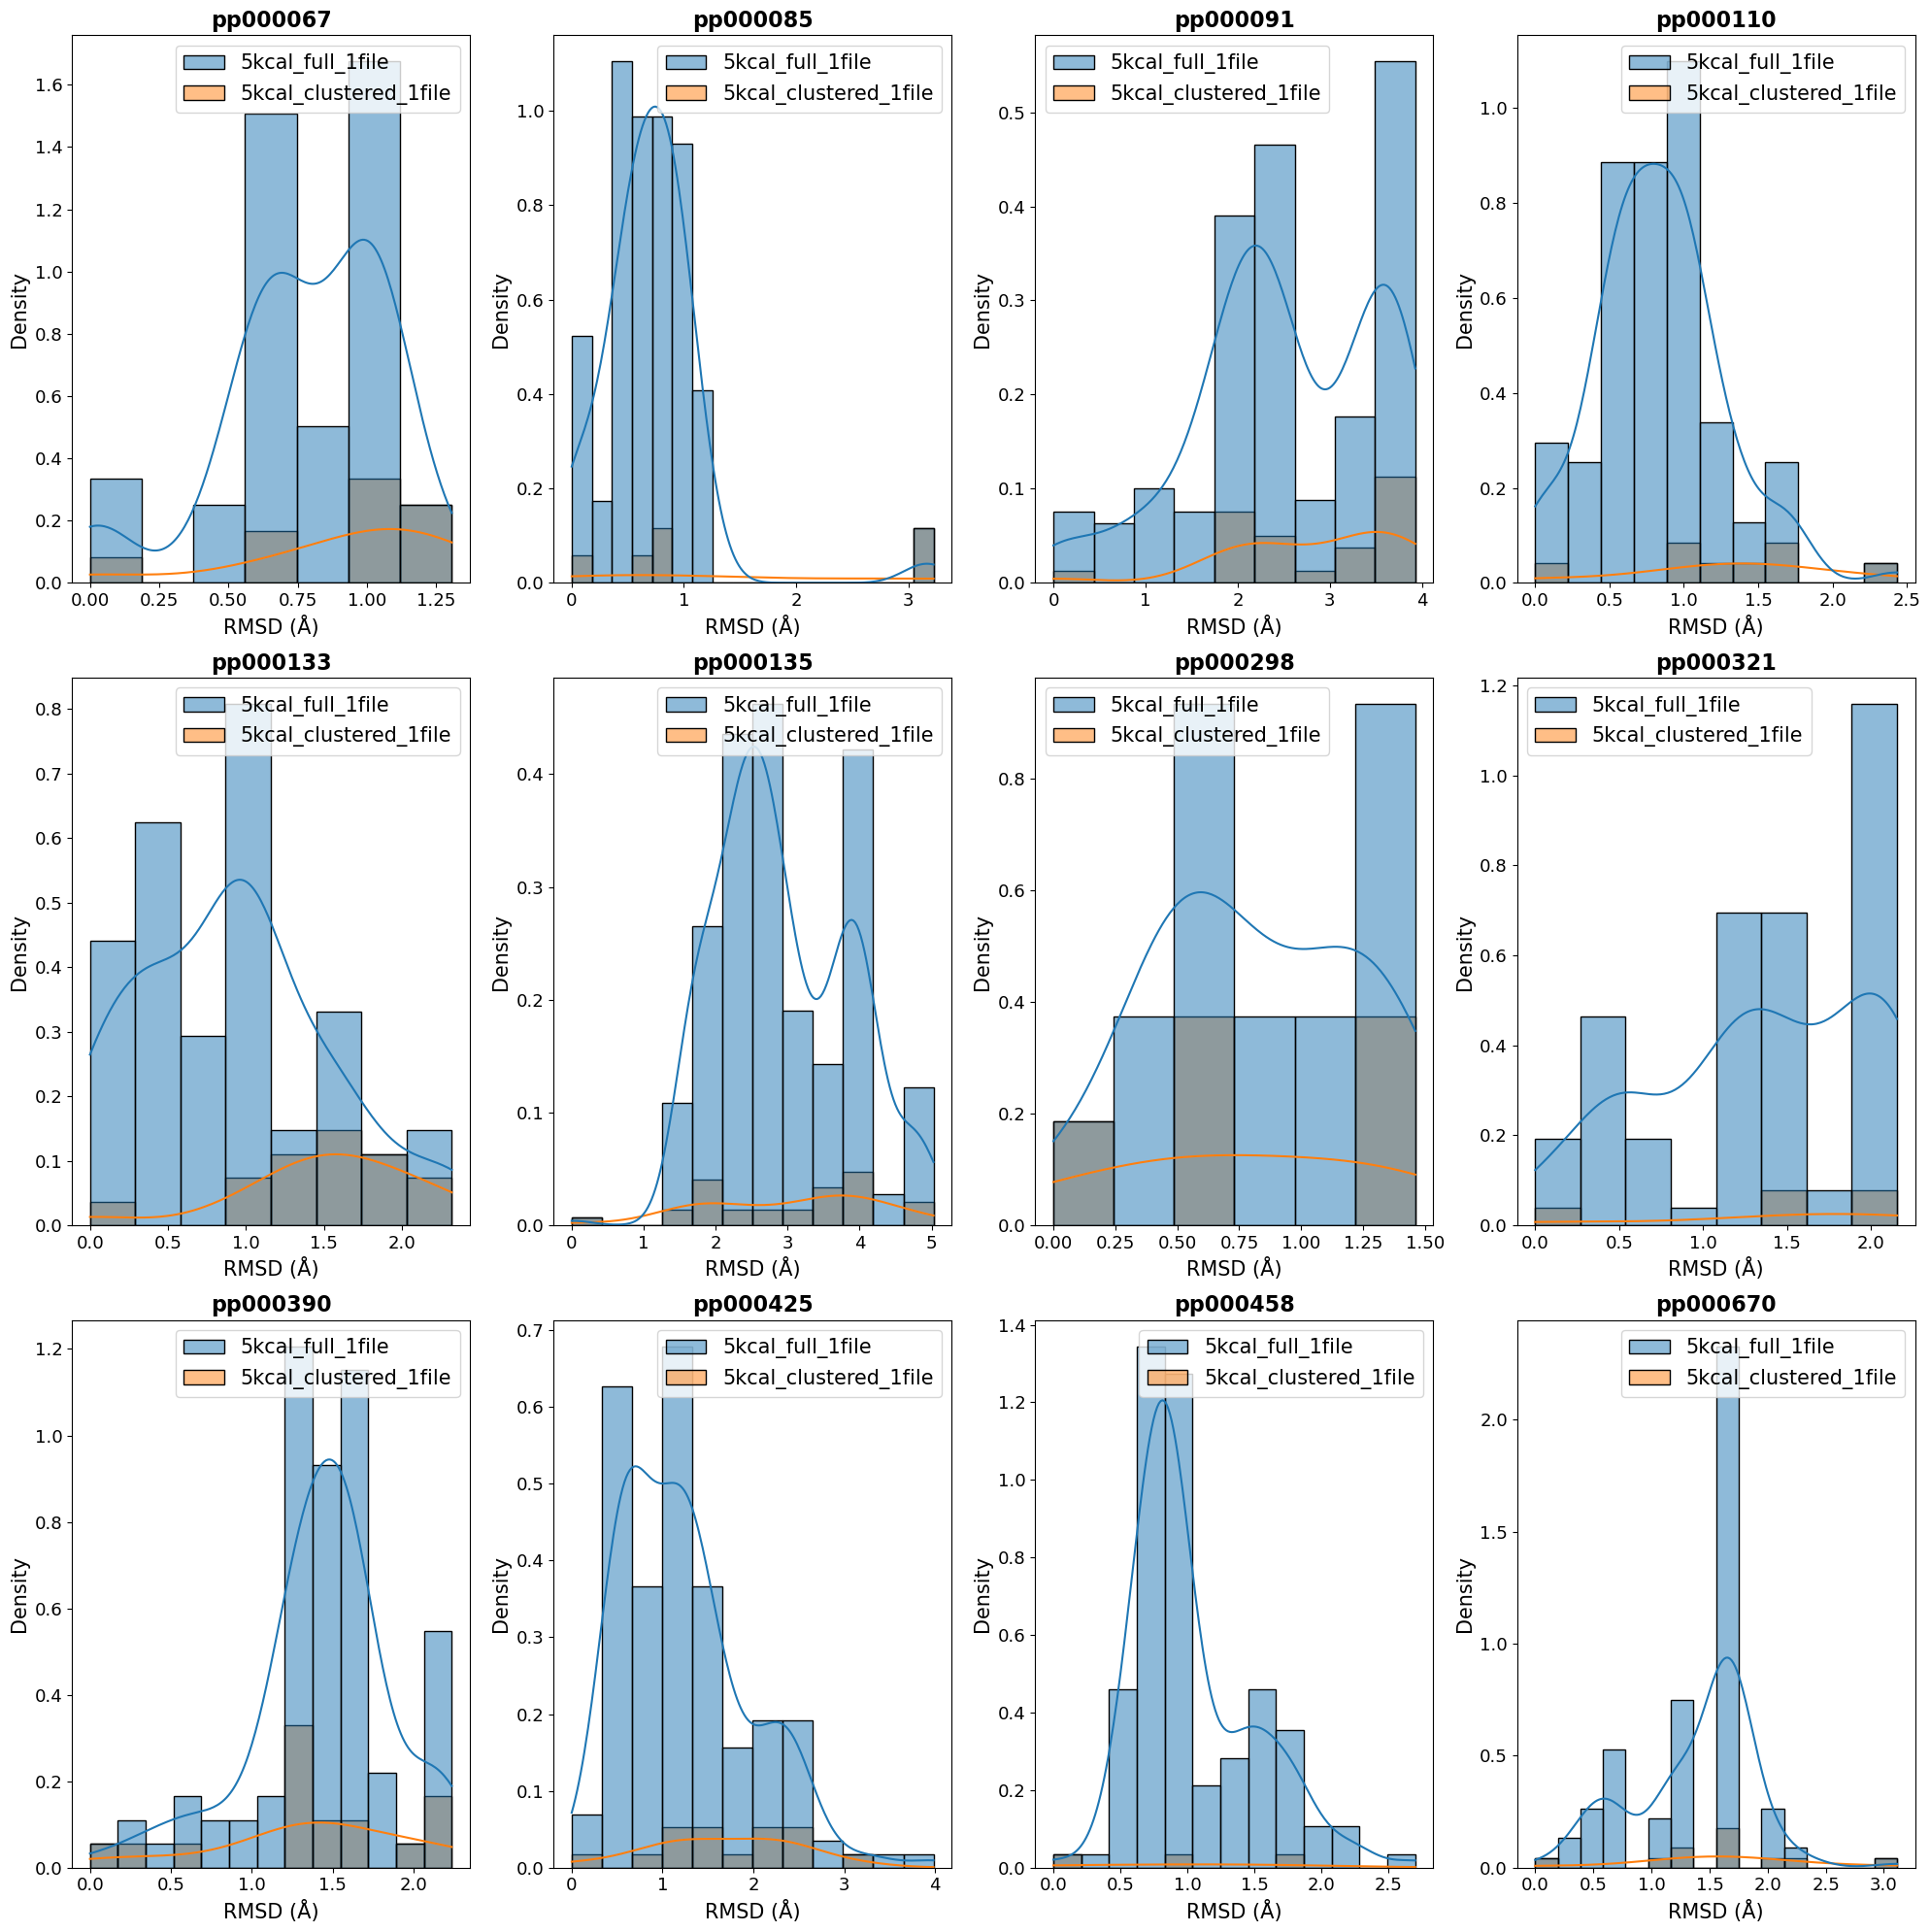

In [6]:
# change set 1 and set 2 to the desired paths to compare different ensembles
# set save=True to save the figure

plot_conformers.rmsd_analysis(ligands, set1=full_5kcal_1file, set2=clustered_5kcal_1file, save=True)

# 4. Collect ensemble features

The following sections collect bite angle, buried volume (r = 3.5 Å), solid angle, equivalent cone angle and %G for each of the conformers from each CREST conformer search using the _MORFEUS_ Python package. Resultant CSV files containing features are saved in the pre-defined `features_path`. No user input is required. 

**Note: this can take a while to run and is only required to be run once.** After running, you can skip to the next section.

In [ ]:
# get features for the 5 kcal/mol full ensemble

ensemble = full_5kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = get_features.get_bite_angle(file)
    buried_volume = get_features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = get_features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

In [ ]:
# get features for the 5 kcal/mol clustered ensemble

ensemble = clustered_5kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = get_features.get_bite_angle(file)
    buried_volume = get_features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = get_features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

In [ ]:
# get features for the 10 kcal/mol full ensemble

ensemble = full_10kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = get_features.get_bite_angle(file)
    buried_volume = get_features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = get_features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

In [ ]:
# get features for the 10 kcal/mol clustered ensemble

ensemble = clustered_10kcal

prop_df = pd.DataFrame(columns = ["file", "bite_angle", "buried_volume", "solid_angle", "equivalent_cone_angle", "G_param"])

expected_jobs = len(list(ensemble.iterdir()))

for file in tqdm(ensemble.iterdir(), total=expected_jobs):
    bite_angle = get_features.get_bite_angle(file)
    buried_volume = get_features.get_buried_volume(file)
    solid_angle, solid_cone_angle, g_param = get_features.get_solid_angle(file)

    prop_df.loc[len(prop_df.index)] = [file.stem, bite_angle, buried_volume, solid_angle, solid_cone_angle, g_param]

display(prop_df)
prop_df.to_csv(features_path / f"{ensemble.stem}_ensemble_features.csv")

# 5. Analyze ensemble features

This analyzes the features collected in the above section. First, the paths to the CSV files are defined.

In [ ]:
full_5kcal_features = pd.read_csv(features_path / "5kcal_full_ensemble_features.csv")
clustered_5kcal_features = pd.read_csv(features_path / "5kcal_clustered_ensemble_features.csv")
full_10kcal_features = pd.read_csv(features_path / "10kcal_full_ensemble_features.csv")
clustered_10kcal_features = pd.read_csv(features_path / "10kcal_clustered_ensemble_features.csv")

This cell plots histograms of the features between two sets of conformers. See comments next to arguments to see what changes are required for each conformer set and feature.

In [ ]:
plot_conformers.feature_histograms(ligands, 
                                   feature = 'solid_angle',  # change feature to plot different features
                                   data1 = full_5kcal_features,  # specify first feature set
                                   data2 = clustered_5kcal_features,  # specify second feature set
                                   label1 = "full_5kcal_features",  # specify label for first feature set
                                   label2 = "clustered_5kcal_features",  # specify label for second feature set
                                   save=True)  # specify label for second feature set